# Text Classification
## Importing dataset
Label: It contains labels for five different categories : 0,1,2,3,4
1. Politics = 0
2. Sport = 1
3. Technology = 2
4. Entertainment =3
5. Business = 4

In [3]:
# Importing modules
import pandas as pd
 
# Read data into df
df = pd.read_csv(r"/kaggle/input/text-document-classification-dataset/df_file.csv")   # eclipse_jdk.csv
# Print head
df.head()


,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


## Plotting priority

<Axes: xlabel='Label'>

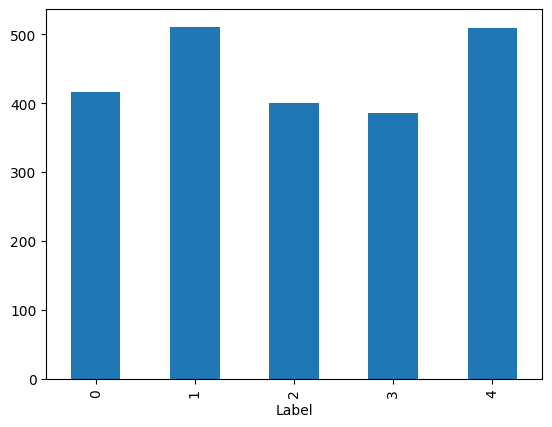

In [4]:
df['Label'].value_counts().sort_index().plot(kind='bar')

## Removing odd words

In [5]:
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

## Data cleaning

In [7]:
df = df.dropna()
df['Text'] = df['Text'].apply(clean)
df = df[df['Text'].str.len() > 50]
df.sample(2)

,Text,Label
2197,UK young top Euro earnings league British chil...,4
748,Greek duo cleared in doping case Sprinters Kos...,1


## Splitting the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'],
                                                    df['Label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Label'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  1780
Size of Test Data  445


## Converting X_train into numbers

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

## Initializing model

In [10]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

## Getting accuracy value

In [11]:
from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.9797752808988764


## Running dummy classifier

In [12]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.2292134831460674


## Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

array([[ 82,   0,   1,   1,   0],
       [  0, 102,   0,   0,   0],
       [  0,   0,  79,   0,   1],
       [  0,   0,   1,  76,   0],
       [  1,   1,   2,   1,  97]])

## Plotting confusion matrix

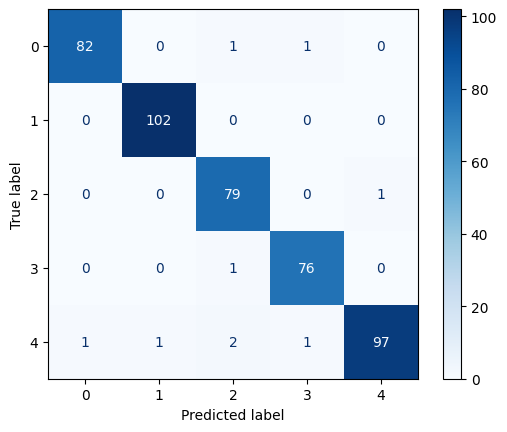

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay as CMD
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
disp = CMD(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Classification report

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.99      1.00      1.00       102
           2       0.95      0.99      0.97        80
           3       0.97      0.99      0.98        77
           4       0.99      0.95      0.97       102

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



## Down sampling

In [16]:
# Filter bug reports with priority P3 and sample 4000 rows from it
df_sampleP3 = df[df['Label'] == 1].sample(n=500, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Label'] != 1]

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Label'].value_counts()

Label
4    510
1    500
0    417
2    401
3    386
Name: count, dtype: int64

## Repeating everything

In [17]:
# Loading the balanced dataframe

df = df_balanced[['Text', 'Label']]
df = df.dropna()

# Step 1 - Data Preparation

df['Text'] = df['Text'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'],
                                                    df['Label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Label'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  1771
Size of Test Data  443
Accuracy Score -  0.9751693002257337
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.99      0.99      0.99       100
           2       0.94      0.99      0.96        80
           3       0.97      0.97      0.97        77
           4       0.98      0.95      0.97       102

    accuracy                           0.98       443
   macro avg       0.97      0.98      0.97       443
weighted avg       0.98      0.98      0.98       443



## Finding best with gridsearchCV

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
# Loading the dataframe
df = pd.read_csv(r"/kaggle/input/text-document-classification-dataset/df_file.csv")
df = df.dropna()
# Step 1 - Data Preparation
df['text'] = df['Text'].apply(clean)
df = df.drop(columns = ['Text'])
df = df[df['text'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('Label', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Label'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

/tmp/ipykernel_34/3452541130.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Label', as_index=False).apply(pd.DataFrame.sample,


Size of Training Data  355
Size of Test Data  89
Best alpha parameter identified by grid search  {'model__C': 1, 'model__kernel': 'linear', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)}
Best result identified by grid search  0.9464788732394366
Accuracy Score -  0.9550561797752809
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.95      0.95      0.95        21
           2       1.00      0.88      0.93        16
           3       0.94      1.00      0.97        15
           4       0.95      0.95      0.95        20

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.95        89
weighted avg       0.96      0.96      0.95        89

